# Python Intro 4
 
In this notebook we will work with DataFrames. We will join and append some different tables in different ways.
Threre are three main functions in Pandas that enable this kind of manipulations:
 
+ pd.merge()
+ df.join()
+ pd.concat()

### Merge
 
Merge is the main function used to combine the content of two dataframes. It do so based common columns or indices in both dataframes.
 
First we will create the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.DataFrame({'student_id': [101,102,103,104,105,106],
                    'name':['Kelly','George','David','Lesly','Paul','Jane'],
                    'year':['first','first','second','third','second','first']})
df1#.head()

,student_id,name,year
0,101,Kelly,first
1,102,George,first
2,103,David,second
3,104,Lesly,third
4,105,Paul,second
5,106,Jane,first


In [3]:
data = [[101, 'Mathematics', 88],
        [101, 'English', 90],
        [101, 'Sport', 75],
        [102, 'Arts', 87],
        [102, 'English', 97],
        [103, 'Sport', 100],
        [103, 'Mathematics', 69],
        [103, 'Biology', 83],
        [103, 'English', 84],
        [104, 'English', 67],
        [104, 'Arts', 100],
        [105, 'Sport',97],
        [105, 'Mathematics', 100],
        [106, 'History', 85]]
df2 = pd.DataFrame(data, columns=['student_id','course_name','grade'])

df2#.head()

,student_id,course_name,grade
0,101,Mathematics,88
1,101,English,90
2,101,Sport,75
3,102,Arts,87
4,102,English,97
5,103,Sport,100
6,103,Mathematics,69
7,103,Biology,83
8,103,English,84
9,104,English,67


In [4]:
data = [
    {'course_id': 10,'name':'Mathematics','teacher':'John Brown'},
    {'course_id': 11,'name':'English','teacher':'Pamela Green'},
    {'course_id': 12,'name':'Sport','teacher':'Rod Farber'},
    {'course_id': 13,'name':'Arts','teacher':'James Carter'},
    {'course_id': 14,'name':'History','teacher':'Sindy Cohen'},
    {'course_id': 15,'name':'Biology','teacher':'Helen Hudson'},
    {'course_id': 16,'name':'Engineering','teacher':'Dorian Law'},
    {'course_id': 17,'name':'Chemistry','teacher':'Joseph Casten'}
]

df3 = pd.DataFrame(data)

df3.head()

,course_id,name,teacher
0,10,Mathematics,John Brown
1,11,English,Pamela Green
2,12,Sport,Rod Farber
3,13,Arts,James Carter
4,14,History,Sindy Cohen


As you can see in the code, there are many ways to create a dataframe!
 
Now, we will begin to join two of the three tables. We have to decide first what we want the table to be used for. 
 
Lets say we want to <b> print a table with the name of the students and the grade of those who are taking the English course </b>.
 
The frist step will be to select the list of students that are in the english course (df2)

In [5]:
english = df2[df2.course_name=='English']
english

,student_id,course_name,grade
1,101,English,90
4,102,English,97
8,103,English,84
9,104,English,67


Next we have to add to this list the name of the students. To do so, we have to get only the names of the students (df1) that matches the student_id in the english table. This kind of combination is called INNER JOIN, and is shown in the following graph:

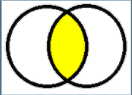

By using merge we can achieve this. Merge will use the common columns in both tables. 

In [7]:
pd.merge(df2, df1)

,student_id,course_name,grade,name,year
0,101,Mathematics,88,Kelly,first
1,101,English,90,Kelly,first
2,101,Sport,75,Kelly,first
3,102,Arts,87,George,first
4,102,English,97,George,first
5,103,Sport,100,David,second
6,103,Mathematics,69,David,second
7,103,Biology,83,David,second
8,103,English,84,David,second
9,104,English,67,Lesly,third


If there are not common columns it will use the row indexes. If you take a lock to the english table, the first column is the index column. In this column you can see that the numbers jump. This is because each row retains the index from the original dataset. You can't use merge without common columns.

In [132]:
pd.merge(df1, df3)

,student_id,name,year,course_id,teacher


In case that in two dataframes there is a common column, but they have a different name, we will need to say the merge function which columns has to use to do the merge:

In [5]:
dd1 = pd.DataFrame({'id':[1,2,3,4], 'obj':['orange','apple','banana','melon']})
dd2 = pd.DataFrame({'Id':[1,2,3,4], 'price':[5.30,8.65,3.25,7.10]})

dd3 = pd.merge(dd1,dd2,left_on='id',right_on='Id')
dd3

,id,obj,Id,price
0,1,orange,1,5.30
1,2,apple,2,8.65
2,3,banana,3,3.25
3,4,melon,4,7.10


In [6]:
dd3[['id','obj','price']]

,id,obj,price
0,1,orange,5.30
1,2,apple,8.65
2,3,banana,3.25
3,4,melon,7.10


Now we want to make a table with the grades and put the name of the student on it. Here we will merge using a "many-to-one" join: 

In [138]:
pd.merge(df2,df1)

,student_id,course_name,grade,name,year
0,101,Mathematics,88,Kelly,first
1,101,English,90,Kelly,first
2,101,Sport,75,Kelly,first
3,102,Arts,87,George,first
4,102,English,97,George,first
5,103,Sport,100,David,second
6,103,Mathematics,69,David,second
7,103,Biology,83,David,second
8,103,English,84,David,second
9,104,English,67,Lesly,third


What happens if there are more than one common column in the dataframe?
Here is an example:

In [8]:
dd1 = pd.DataFrame({'id':[1,2,3,4,5], 
                    'obj':['orange','apple','banana','watermelon','melon'],
                    'in_stock':[450,150,350,0,100]})
dd1

,id,obj,in_stock
0,1,orange,450
1,2,apple,150
2,3,banana,350
3,4,watermelon,0
4,5,melon,100


In [9]:
dd2 = pd.DataFrame({'id':[1,2,3,5], 'obj':['orange','apple','banana','melon'],
                    'price':[5.30,8.65,3.25,7.10]})
dd2

,id,obj,price
0,1,orange,5.30
1,2,apple,8.65
2,3,banana,3.25
3,5,melon,7.10


In [10]:
pd.merge(dd1,dd2)

,id,obj,in_stock,price
0,1,orange,450,5.30
1,2,apple,150,8.65
2,3,banana,350,3.25
3,5,melon,100,7.10


In [145]:
pd.merge(dd1,dd2,on='id')

,id,obj_x,in_stock,obj_y,price
0,1,orange,450,orange,5.30
1,2,apple,150,apple,8.65
2,3,banana,350,banana,3.25
3,5,melon,100,melon,7.10


What happens here?
 
We have in the first table 5 items while in the second have 4. The resulting dataframe has only 4 items. This is because the default behavior of the merge function is to make an inner join.
 
If we want to print all the elements of the first table we have to make a left join:

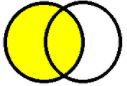

To make a left join, we have to tell merge the parameter 'how':

In [146]:
pd.merge(dd1,dd2,how='left')

,id,obj,in_stock,price
0,1,orange,450,5.30
1,2,apple,150,8.65
2,3,banana,350,3.25
3,4,watermelon,0,NaN
4,5,melon,100,7.10


In [147]:
pd.merge(dd1,dd2,how='right')

,id,obj,in_stock,price
0,1,orange,450,5.30
1,2,apple,150,8.65
2,3,banana,350,3.25
3,5,melon,100,7.10


In [148]:
pd.merge(dd2,dd1,how='left')

,id,obj,price,in_stock
0,1,orange,5.30,450
1,2,apple,8.65,150
2,3,banana,3.25,350
3,5,melon,7.10,100


In [153]:
dd1.values

array([[1, 'orange', 450],
       [2, 'apple', 150],
       [3, 'banana', 350],
       [4, 'watermelon', 0],
       [5, 'melon', 100]], dtype=object)

### Join

Now we will can to use another function called "join". We call the join by giving the function after the main table we want to join, and giving the second table as a parameter. Join uses merge to do its job, but makes it more efficiently

In [12]:
dd1_2 = dd1.set_index(['id','obj'])
dd1_2

,,in_stock
id,obj,
1,orange,450
2,apple,150
3,banana,350
4,watermelon,0
5,melon,100


In [13]:
dd1_2.index

MultiIndex([(1,     'orange'),
            (2,      'apple'),
            (3,     'banana'),
            (4, 'watermelon'),
            (5,      'melon')],
           names=['id', 'obj'])

In [14]:
dd1_2.values

array([[450],
       [150],
       [350],
       [  0],
       [100]], dtype=int64)

In [15]:
dd2_2 = dd2.set_index(['id','obj'])
dd2_2

,,price
id,obj,
1,orange,5.30
2,apple,8.65
3,banana,3.25
5,melon,7.10


In [16]:
dd2.values

array([[1, 'orange', 5.3],
       [2, 'apple', 8.65],
       [3, 'banana', 3.25],
       [5, 'melon', 7.1]], dtype=object)

In [17]:
dd2_2.values

array([[5.3 ],
       [8.65],
       [3.25],
       [7.1 ]])

In [19]:
dd1.join(dd2, lsuffix='_l',rsuffix='_r')

,id_l,obj_l,in_stock,id_r,obj_r,price
0,1,orange,450,1.0,orange,5.30
1,2,apple,150,2.0,apple,8.65
2,3,banana,350,3.0,banana,3.25
3,4,watermelon,0,5.0,melon,7.10
4,5,melon,100,NaN,NaN,NaN


In [18]:
dd1_2.join(dd2_2, lsuffix='_x',rsuffix='_y')

,,in_stock,price
id,obj,,
1,orange,450,5.30
2,apple,150,8.65
3,banana,350,3.25
4,watermelon,0,NaN
5,melon,100,7.10


In [21]:
dd1_2.join(dd2_2)

,,in_stock,price
id,obj,,
1,orange,450,5.30
2,apple,150,8.65
3,banana,350,3.25
4,watermelon,0,NaN
5,melon,100,7.10


In [158]:
dd3 = dd1_2.join(dd2_2)
dd3

,,in_stock,price
id,obj,,
1,orange,450,5.30
2,apple,150,8.65
3,banana,350,3.25
4,watermelon,0,NaN
5,melon,100,7.10


In [23]:
dd3.values

array([[450.  ,   5.3 ],
       [150.  ,   8.65],
       [350.  ,   3.25],
       [  0.  ,    nan],
       [100.  ,   7.1 ]])

In [163]:
dd3 = dd3.reset_index()

In [164]:
dd3.loc[:,['id','obj','in_stock']]

,id,obj,in_stock
0,1,orange,450
1,2,apple,150
2,3,banana,350
3,4,watermelon,0
4,5,melon,100


### Concat
 
The concat function is intended to combine or append to dataframes by rows or columns. Concat requires that both dataframes that will be concatenated will be similar on their number of rows or the number of columns. By default, concat append rows.

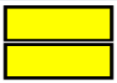



However, it can also be done by appending columns by defining the 'axis' parameter as rows (axis=0) or columns (axis=1) 

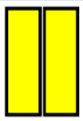


In [25]:
dd3 = pd.concat([dd1,dd2],axis=1)
dd3

,id,obj,in_stock,id,obj,price
0,1,orange,450,1.0,orange,5.30
1,2,apple,150,2.0,apple,8.65
2,3,banana,350,3.0,banana,3.25
3,4,watermelon,0,5.0,melon,7.10
4,5,melon,100,NaN,NaN,NaN


In [26]:
dd3 = pd.concat([dd1_2,dd2_2],axis=1)
dd3

,,in_stock,price
id,obj,,
1,orange,450,5.30
2,apple,150,8.65
3,banana,350,3.25
4,watermelon,0,NaN
5,melon,100,7.10


What will happen if we use concat with those same dataframes, but with axis = 0 ?

In [27]:
dd3 = pd.concat([dd1,dd2],axis=0)
dd3

,id,obj,in_stock,price
0,1,orange,450.0,NaN
1,2,apple,150.0,NaN
2,3,banana,350.0,NaN
3,4,watermelon,0.0,NaN
4,5,melon,100.0,NaN
0,1,orange,NaN,5.30
1,2,apple,NaN,8.65
2,3,banana,NaN,3.25
3,5,melon,NaN,7.10


As we can see, it returned a new dataframe appended by their rows, but resulted on the addition of the columns in_stock and price from each of the tables. The cells that were not found in the other dataframe is filled with NaN.
 
Another function that makes the same is append. Append is a shortcut for Concat, but with restrictions.

In [28]:
dd1.append(dd2)

,id,obj,in_stock,price
0,1,orange,450.0,NaN
1,2,apple,150.0,NaN
2,3,banana,350.0,NaN
3,4,watermelon,0.0,NaN
4,5,melon,100.0,NaN
0,1,orange,NaN,5.30
1,2,apple,NaN,8.65
2,3,banana,NaN,3.25
3,5,melon,NaN,7.10


## Reshaping Dataframes
 
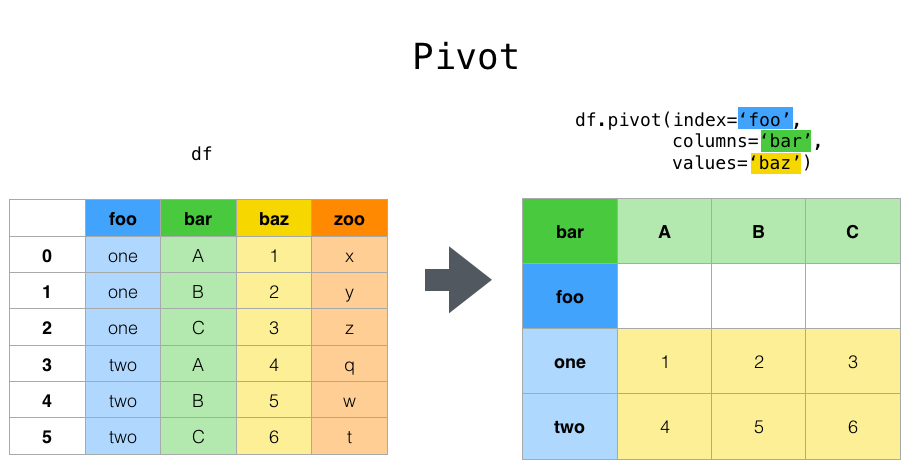

(source: https://pandas.pydata.org/docs/user_guide/reshaping.html)
 



In [20]:
data = [[101, 'Mathematics', 88],
        [101, 'English', 90],
        [101, 'Sport', 75],
        [102, 'Arts', 87],
        [102, 'English', 97],
        [103, 'Sport', 100],
        [103, 'Mathematics', 69],
        [103, 'Biology', 83],
        [103, 'English', 84],
        [104, 'English', 67],
        [104, 'Arts', 100],
        [105, 'Sport',97],
        [105, 'Mathematics', 100],
        [106, 'History', 85]]
df2 = pd.DataFrame(data, columns=['student_id','course_name','grade'])

df2.head()

,student_id,course_name,grade
0,101,Mathematics,88
1,101,English,90
2,101,Sport,75
3,102,Arts,87
4,102,English,97


In [175]:
pivoted = df2.pivot(index="student_id",columns="course_name")
pivoted

grade                                           
course_name   Arts Biology English History Mathematics  Sport
student_id                                                   
101            NaN     NaN    90.0     NaN        88.0   75.0
102           87.0     NaN    97.0     NaN         NaN    NaN
103            NaN    83.0    84.0     NaN        69.0  100.0
104          100.0     NaN    67.0     NaN         NaN    NaN
105            NaN     NaN     NaN     NaN       100.0   97.0
106            NaN     NaN     NaN    85.0         NaN    NaN

In [176]:
stacked = pivoted.stack()
stacked

grade
student_id course_name       
101        English       90.0
           Mathematics   88.0
           Sport         75.0
102        Arts          87.0
           English       97.0
103        Biology       83.0
           English       84.0
           Mathematics   69.0
           Sport        100.0
104        Arts         100.0
           English       67.0
105        Mathematics  100.0
           Sport         97.0
106        History       85.0

In [179]:
type(stacked)


pandas.core.frame.DataFrame

In [181]:
stacked.reset_index()

,student_id,course_name,grade
0,101,English,90.0
1,101,Mathematics,88.0
2,101,Sport,75.0
3,102,Arts,87.0
4,102,English,97.0
5,103,Biology,83.0
6,103,English,84.0
7,103,Mathematics,69.0
8,103,Sport,100.0
9,104,Arts,100.0


In [177]:
unstacked = stacked.unstack()
unstacked

grade                                           
course_name   Arts Biology English History Mathematics  Sport
student_id                                                   
101            NaN     NaN    90.0     NaN        88.0   75.0
102           87.0     NaN    97.0     NaN         NaN    NaN
103            NaN    83.0    84.0     NaN        69.0  100.0
104          100.0     NaN    67.0     NaN         NaN    NaN
105            NaN     NaN     NaN     NaN       100.0   97.0
106            NaN     NaN     NaN    85.0         NaN    NaN

In [178]:
type(unstacked)

pandas.core.frame.DataFrame

In [182]:
unstacked.reset_index()

student_id  grade                                           
course_name              Arts Biology English History Mathematics  Sport
0                  101    NaN     NaN    90.0     NaN        88.0   75.0
1                  102   87.0     NaN    97.0     NaN         NaN    NaN
2                  103    NaN    83.0    84.0     NaN        69.0  100.0
3                  104  100.0     NaN    67.0     NaN         NaN    NaN
4                  105    NaN     NaN     NaN     NaN       100.0   97.0
5                  106    NaN     NaN     NaN    85.0         NaN    NaN

In [183]:
unstacked.columns

MultiIndex([('grade',        'Arts'),
            ('grade',     'Biology'),
            ('grade',     'English'),
            ('grade',     'History'),
            ('grade', 'Mathematics'),
            ('grade',       'Sport')],
           names=[None, 'course_name'])

In [184]:
unstacked.columns = ['Arts','Biology','English','History','Mathematics','Sport']
unstacked

,Arts,Biology,English,History,Mathematics,Sport
student_id,,,,,,
101,NaN,NaN,90.0,NaN,88.0,75.0
102,87.0,NaN,97.0,NaN,NaN,NaN
103,NaN,83.0,84.0,NaN,69.0,100.0
104,100.0,NaN,67.0,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,100.0,97.0
106,NaN,NaN,NaN,85.0,NaN,NaN


In [185]:
unstacked.columns

Index(['Arts', 'Biology', 'English', 'History', 'Mathematics', 'Sport'], dtype='object')

In [187]:
df2.head()

,student_id,course_name,grade
0,101,Mathematics,88
1,101,English,90
2,101,Sport,75
3,102,Arts,87
4,102,English,97


In [186]:
melted = df2.melt(id_vars=['student_id','course_name'])
melted

,student_id,course_name,variable,value
0,101,Mathematics,grade,88
1,101,English,grade,90
2,101,Sport,grade,75
3,102,Arts,grade,87
4,102,English,grade,97
5,103,Sport,grade,100
6,103,Mathematics,grade,69
7,103,Biology,grade,83
8,103,English,grade,84
9,104,English,grade,67


In [21]:
melted = df2.melt(id_vars=['student_id'])
melted

,student_id,variable,value
0,101,course_name,Mathematics
1,101,course_name,English
2,101,course_name,Sport
3,102,course_name,Arts
4,102,course_name,English
5,103,course_name,Sport
6,103,course_name,Mathematics
7,103,course_name,Biology
8,103,course_name,English
9,104,course_name,English


#### Crosstabs


In [37]:
df2

,student_id,course_name,grade
0,101,Mathematics,88
1,101,English,90
2,101,Sport,75
3,102,Arts,87
4,102,English,97
5,103,Sport,100
6,103,Mathematics,69
7,103,Biology,83
8,103,English,84
9,104,English,67


In [69]:
pd.crosstab(index=df2['student_id'],columns=df2['course_name'])

course_name,Arts,Biology,English,History,Mathematics,Sport
student_id,,,,,,
101,0,0,1,0,1,1
102,1,0,1,0,0,0
103,0,1,1,0,1,1
104,1,0,1,0,0,0
105,0,0,0,0,1,1
106,0,0,0,1,0,0


In [71]:
pd.crosstab(index=df2['student_id'],
            columns=df2['course_name'],
            aggfunc="mean",
            values=df2['grade'])

course_name,Arts,Biology,English,History,Mathematics,Sport
student_id,,,,,,
101,NaN,NaN,90.0,NaN,88.0,75.0
102,87.0,NaN,97.0,NaN,NaN,NaN
103,NaN,83.0,84.0,NaN,69.0,100.0
104,100.0,NaN,67.0,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,100.0,97.0
106,NaN,NaN,NaN,85.0,NaN,NaN


In [73]:
pd.crosstab(index=df2['student_id'],
            columns=df2['course_name'],
            aggfunc=np.mean,
            values=df2['grade'])

course_name,Arts,Biology,English,History,Mathematics,Sport
student_id,,,,,,
101,NaN,NaN,90.0,NaN,88.0,75.0
102,87.0,NaN,97.0,NaN,NaN,NaN
103,NaN,83.0,84.0,NaN,69.0,100.0
104,100.0,NaN,67.0,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,100.0,97.0
106,NaN,NaN,NaN,85.0,NaN,NaN


### Data Types in Pandas
 
+ Numeric
+ Object
+ Categories
+ Text
+ Dates

### Manipulating Data Types in Pandas
- Changing the data type
- Checking the data types



In [22]:
data = [[101, 'Mathematics', 88,'2019-03-22'],
        [101, 'English', 90,'2019-04-02'],
        [101, 'Sport', 75,'2019-03-18'],
        [102, 'Arts', 87,'2019-03-05'],
        [102, 'English', 97,'2019-03-22'],
        [103, 'Sport', 100,'2019-03-18'],
        [103, 'Mathematics', 69,'2019-03-22'],
        [103, 'Biology', 83,'2019-04-02'],
        [103, 'English', 84,'2019-03-22'],
        [104, 'English', 67,'2019-03-22'],
        [104, 'Arts', 100,'2019-03-05'],
        [105, 'Sport',97,'2019-03-18'],
        [105, 'Mathematics', 100,'2019-03-22'],
        [106, 'History', 85,'2019-04-11']]
df2 = pd.DataFrame(data, columns=['student_id','course_name','grade','grade_date'])

df2.head()

,student_id,course_name,grade,grade_date
0,101,Mathematics,88,2019-03-22
1,101,English,90,2019-04-02
2,101,Sport,75,2019-03-18
3,102,Arts,87,2019-03-05
4,102,English,97,2019-03-22


In [23]:
df2.dtypes

student_id      int64
course_name    object
grade           int64
grade_date     object
dtype: object

In [24]:
df2.course_name = df2.course_name.astype('category')
df2.dtypes

student_id        int64
course_name    category
grade             int64
grade_date       object
dtype: object

In [25]:
df2.grade = df2.grade.astype('float')
df2.dtypes

student_id        int64
course_name    category
grade           float64
grade_date       object
dtype: object

In [203]:
df2.grade_date = df2.grade_date.astype('datetime64')
df2.dtypes

student_id              int64
course_name          category
grade                 float64
grade_date     datetime64[ns]
dtype: object

In [26]:
df2.head()

,student_id,course_name,grade,grade_date
0,101,Mathematics,88.0,2019-03-22
1,101,English,90.0,2019-04-02
2,101,Sport,75.0,2019-03-18
3,102,Arts,87.0,2019-03-05
4,102,English,97.0,2019-03-22


In [197]:
from pandas.api.types import is_string_dtype, is_categorical_dtype, is_numeric_dtype, is_datetime64_dtype

print('student_id:', is_numeric_dtype(df2.student_id))
print('course_name:', is_numeric_dtype(df2.course_name))
print('grade:', is_numeric_dtype(df2.grade))
print('grade_date:', is_numeric_dtype(df2.grade_date))


student_id: True
course_name: False
grade: True
grade_date: False


In [204]:
print('student_id:', is_string_dtype(df2.student_id))
print('course_name:', is_string_dtype(df2.course_name))
print('grade:', is_string_dtype(df2.grade))
print('grade_date:', is_string_dtype(df2.grade_date))


student_id: False
course_name: False
grade: False
grade_date: False


In [205]:
print('student_id:', is_categorical_dtype(df2.student_id))
print('course_name:', is_categorical_dtype(df2.course_name))
print('grade:', is_categorical_dtype(df2.grade))
print('grade_date:', is_categorical_dtype(df2.grade_date))


student_id: False
course_name: True
grade: False
grade_date: False


In [206]:
print('student_id:', is_datetime64_dtype(df2.student_id))
print('course_name:', is_datetime64_dtype(df2.course_name))
print('grade:', is_datetime64_dtype(df2.grade))
print('grade_date:', is_datetime64_dtype(df2.grade_date))


student_id: False
course_name: False
grade: False
grade_date: True


### Data Transformations

+ get_dummies
+ cut
+ factorize


#### Dummies

get_dummies: Convert categorical variable into dummy/indicator variables.

In [105]:
df2.course_name

0     Mathematics
1         English
2           Sport
3            Arts
4         English
5           Sport
6     Mathematics
7         Biology
8         English
9         English
10           Arts
11          Sport
12    Mathematics
13        History
Name: course_name, dtype: category
Categories (6, object): ['Arts', 'Biology', 'English', 'History', 'Mathematics', 'Sport']

In [104]:
pd.get_dummies(df2.course_name)

,Arts,Biology,English,History,Mathematics,Sport
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0


#### Cut
 
Bin values into discrete intervals.

In [31]:
df2['grades_cat'] = pd.cut(df2.grade,bins=4)
df2

,student_id,course_name,grade,grade_date,grades_cat
0,101,Mathematics,88.0,2019-03-22,"(83.5, 91.75]"
1,101,English,90.0,2019-04-02,"(83.5, 91.75]"
2,101,Sport,75.0,2019-03-18,"(66.967, 75.25]"
3,102,Arts,87.0,2019-03-05,"(83.5, 91.75]"
4,102,English,97.0,2019-03-22,"(91.75, 100.0]"
5,103,Sport,100.0,2019-03-18,"(91.75, 100.0]"
6,103,Mathematics,69.0,2019-03-22,"(66.967, 75.25]"
7,103,Biology,83.0,2019-04-02,"(75.25, 83.5]"
8,103,English,84.0,2019-03-22,"(83.5, 91.75]"
9,104,English,67.0,2019-03-22,"(66.967, 75.25]"


In [32]:
df2['grades_cat'].dtype

CategoricalDtype(categories=[(66.967, 75.25], (75.25, 83.5], (83.5, 91.75], (91.75, 100.0]],
              ordered=True)

#### Factorize.
 
This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

In [33]:
a = pd.factorize([1,2,2,2,3,3,4,5,6,7,8,9,10])
a

(array([0, 1, 1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))

In [117]:
a[1]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [34]:
pd.factorize(df2.grade)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  5,  4,  5, 10],
       dtype=int64),
 Float64Index([88.0, 90.0, 75.0, 87.0, 97.0, 100.0, 69.0, 83.0, 84.0, 67.0,
               85.0],
              dtype='float64'))

In [119]:
pd.factorize(df2.course_name)

(array([0, 1, 2, 3, 1, 2, 0, 4, 1, 1, 3, 2, 0, 5], dtype=int64),
 CategoricalIndex(['Mathematics', 'English', 'Sport', 'Arts', 'Biology',
                   'History'],
                  categories=['Arts', 'Biology', 'English', 'History', 'Mathematics', 'Sport'], ordered=False, dtype='category'))